In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle

In [2]:
# Load dataset from demographics csv and display first five rows
data = pd.read_csv('data_w_genres.csv')
data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [3]:
# Explore the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           32539 non-null  object 
 1   acousticness      32539 non-null  float64
 2   danceability      32539 non-null  float64
 3   duration_ms       32539 non-null  float64
 4   energy            32539 non-null  float64
 5   instrumentalness  32539 non-null  float64
 6   liveness          32539 non-null  float64
 7   loudness          32539 non-null  float64
 8   speechiness       32539 non-null  float64
 9   tempo             32539 non-null  float64
 10  valence           32539 non-null  float64
 11  popularity        32539 non-null  float64
 12  key               32539 non-null  int64  
 13  mode              32539 non-null  int64  
 14  count             32539 non-null  int64  
 15  genres            32539 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [4]:
# Explore the dataset (continued)
data.describe(include="all")

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
count,32539,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539
unique,32539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10841
top,Slick Gizmo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13563
mean,NaN,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818,NaN
std,NaN,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821,NaN
min,NaN,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000,NaN
50%,NaN,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000,NaN
75%,NaN,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000,NaN


In [5]:
# Convert genres string to genres array
def stringToArray(x):
    y = literal_eval(x)
    return (y if len(y) > 0 else np.nan)
data['genres'] = data['genres'].map(stringToArray)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           32539 non-null  object 
 1   acousticness      32539 non-null  float64
 2   danceability      32539 non-null  float64
 3   duration_ms       32539 non-null  float64
 4   energy            32539 non-null  float64
 5   instrumentalness  32539 non-null  float64
 6   liveness          32539 non-null  float64
 7   loudness          32539 non-null  float64
 8   speechiness       32539 non-null  float64
 9   tempo             32539 non-null  float64
 10  valence           32539 non-null  float64
 11  popularity        32539 non-null  float64
 12  key               32539 non-null  int64  
 13  mode              32539 non-null  int64  
 14  count             32539 non-null  int64  
 15  genres            18976 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [6]:
# Drop missing values from variable 'genres'
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18976 entries, 0 to 32538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           18976 non-null  object 
 1   acousticness      18976 non-null  float64
 2   danceability      18976 non-null  float64
 3   duration_ms       18976 non-null  float64
 4   energy            18976 non-null  float64
 5   instrumentalness  18976 non-null  float64
 6   liveness          18976 non-null  float64
 7   loudness          18976 non-null  float64
 8   speechiness       18976 non-null  float64
 9   tempo             18976 non-null  float64
 10  valence           18976 non-null  float64
 11  popularity        18976 non-null  float64
 12  key               18976 non-null  int64  
 13  mode              18976 non-null  int64  
 14  count             18976 non-null  int64  
 15  genres            18976 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [7]:
# Sort and display genres by most occurrences
occurrences = {}
for genres in data['genres']:
    for genre in genres:
        if genre in occurrences:
            occurrences[genre] = occurrences[genre] + 1
        else:
            occurrences[genre] = 1
genres_list = list(occurrences.items())
genres_list.sort(key=lambda x: x[1], reverse=True)
genres_df = pd.DataFrame(genres_list, columns=['Genre', 'Occurrences'])
genres_df.head(39)

,Genre,Occurrences
0,rock,601
1,pop,582
2,dance pop,576
3,rap,498
4,hip hop,487
5,pop rap,463
6,country rock,429
7,urban contemporary,374
8,pop rock,373
9,mellow gold,368


In [8]:
# Get list of genres we're going to WANT TO predict (not 100% they'll be included)
filtered_genres = list(filter(lambda x: x[1] > 200, genres_list))
filtered_genres = genres_list[:25] # Top25 genres
all_genres = list(map(lambda x: x[0], filtered_genres))
print(all_genres)

['rock', 'pop', 'dance pop', 'rap', 'hip hop', 'pop rap', 'country rock', 'urban contemporary', 'pop rock', 'mellow gold', 'soft rock', 'adult standards', 'latin', 'trap', 'classic rock', 'album rock', 'pop dance', 'modern rock', 'funk', 'folk rock', 'new wave pop', 'alternative rock', 'southern hip hop', 'gangster rap', 'country']


In [9]:
# Get top genre for each row
def getGenre(genres):
    occurrences_dict = {}
    for g in all_genres:
        for genre in genres:
            if g in genre:
                if g not in occurrences_dict:
                    occurrences_dict[g] = 1
                else:
                    occurrences_dict[g] += 1
    genres_tally = list(occurrences_dict.items())
    genres_tally.sort(key=lambda x: x[1], reverse=True)
    if len(genres_tally) > 0:
        return genres_tally[0][0]
    else:
        return np.nan
data['top_genre'] = data['genres'].map(getGenre)
data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,top_genre
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,[show tunes],NaN
8,"""Weird Al"" Yankovic",0.186821,0.650792,218352.962264,0.693189,0.000045,0.160926,-9.691151,0.082275,132.876604,0.764585,32.867925,9,1,106,"[comedy rock, comic, parody]",rock
10,$NOT,0.458167,0.826667,146886.333333,0.518667,0.000007,0.201683,-8.713167,0.272550,90.728833,0.426750,74.166667,0,1,6,"[florida rap, underground hip hop, vapor trap]",rap
11,$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,69.000000,6,1,2,"[dark trap, meme rap]",rap
13,$uicideBoy$,0.154637,0.778551,149915.289855,0.625870,0.024720,0.209223,-6.553899,0.149986,117.679087,0.242772,65.333333,1,1,69,"[dark trap, new orleans rap, underground hip hop]",rap


In [10]:
# Drop missing values from variable 'top_genre'
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10082 entries, 8 to 32538
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           10082 non-null  object 
 1   acousticness      10082 non-null  float64
 2   danceability      10082 non-null  float64
 3   duration_ms       10082 non-null  float64
 4   energy            10082 non-null  float64
 5   instrumentalness  10082 non-null  float64
 6   liveness          10082 non-null  float64
 7   loudness          10082 non-null  float64
 8   speechiness       10082 non-null  float64
 9   tempo             10082 non-null  float64
 10  valence           10082 non-null  float64
 11  popularity        10082 non-null  float64
 12  key               10082 non-null  int64  
 13  mode              10082 non-null  int64  
 14  count             10082 non-null  int64  
 15  genres            10082 non-null  object 
 16  top_genre         10082 non-null  object

In [11]:
# Display # of occurrences for each unique item in top_genre
data['top_genre'].value_counts()

pop                   3647
rock                  3130
rap                   1047
country                593
hip hop                529
latin                  433
funk                   385
adult standards        181
urban contemporary     132
mellow gold              5
Name: top_genre, dtype: int64

In [12]:
# Display # of genres we're ACTUALLY going to predict
len(data['top_genre'].unique())

10

In [13]:
# Drop 'artists' and 'genres' columns
data = data.drop(columns=['artists', 'genres'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10082 entries, 8 to 32538
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      10082 non-null  float64
 1   danceability      10082 non-null  float64
 2   duration_ms       10082 non-null  float64
 3   energy            10082 non-null  float64
 4   instrumentalness  10082 non-null  float64
 5   liveness          10082 non-null  float64
 6   loudness          10082 non-null  float64
 7   speechiness       10082 non-null  float64
 8   tempo             10082 non-null  float64
 9   valence           10082 non-null  float64
 10  popularity        10082 non-null  float64
 11  key               10082 non-null  int64  
 12  mode              10082 non-null  int64  
 13  count             10082 non-null  int64  
 14  top_genre         10082 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 1.2+ MB


In [14]:
# Partition dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data[['acousticness', 'danceability', 'duration_ms', 'energy',
                                                          'instrumentalness', 'liveness', 'loudness', 'speechiness',
                                                          'tempo', 'valence', 'popularity', 'mode', 'key']],
                                                    data['top_genre'], test_size=0.25, random_state = 0)

In [15]:
# Standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
# CLASSIFIER: Decision tree
# Build decision tree
model = DecisionTreeClassifier(criterion="entropy", random_state = 0)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
# Predict class labels using decision tree
y_pred = model.predict(x_test)

In [18]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[  9   4   1   0   0   0  19   3  11   0]
 [  2  36   1   1   3   0  53   4  40   1]
 [  4   3  17   4   4   0  35   6  27   1]
 [  1   1   2  37   2   0  24  32  12   1]
 [  0   3   2   4  24   0  38   4  25   2]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 20  62  19  21  45   1 412  72 269  13]
 [  3   3   1  41  12   0  64 100  31   3]
 [ 11  40  33  10  32   0 229  43 380  13]
 [  0   0   0   1   4   0  14   0   6  10]]


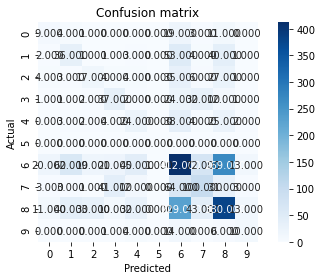

In [19]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [20]:
# Compute evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)) # accuracy
print('Error:', 1 - metrics.accuracy_score(y_test, y_pred)) # error
print('Precision:', metrics.precision_score(y_test, y_pred, average = None)) # precision
print('Recall:', metrics.recall_score(y_test, y_pred, average = None)) # recall
print('F1 Scores:', metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))) # F1 score

Accuracy: 0.40658468861562874
Error: 0.5934153113843712
Precision: [0.18       0.23684211 0.22368421 0.31092437 0.19047619 0.
 0.46396396 0.37878788 0.47440699 0.22727273]
Recall: [0.19148936 0.25531915 0.16831683 0.33035714 0.23529412 0.
 0.44111349 0.3875969  0.48040455 0.28571429]
F1 Scores: 0.4077151414223994


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# CLASSIFIER: Ensemble of decision trees (with bagging)
# Build ensemble of decision trees (with bagging)
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 0), n_estimators = 10, random_state = 0)
model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=0),
                  random_state=0)

In [22]:
# Predict class labels using decision tree
y_pred = model.predict(x_test)

In [23]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 12   0   0   0   0  25   2   8   0]
 [  5  35   1   1   0  64   1  34   0]
 [  1   1  27   1   2  34   4  31   0]
 [  0   0   3  28   2  31  41   7   0]
 [  0   3   1   4  15  56   4  19   0]
 [ 11  31  15  12  22 589  44 207   3]
 [  1   2   2  33   4  84 110  22   0]
 [  4  16  17  10  11 291  11 431   0]
 [  0   1   5   0   1  16   0   7   5]]


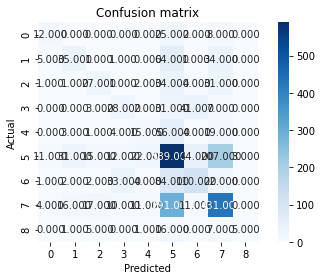

In [24]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [25]:
# Compute evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)) # accuracy
print('Error:', 1 - metrics.accuracy_score(y_test, y_pred)) # error
print('Precision:', metrics.precision_score(y_test, y_pred, average = None)) # precision
print('Recall:', metrics.recall_score(y_test, y_pred, average = None)) # recall
print('F1 Scores:', metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))) # F1 score

Accuracy: 0.496628322094407
Error: 0.503371677905593
Precision: [0.35294118 0.39325843 0.38028169 0.31460674 0.26315789 0.49495798
 0.50691244 0.56266319 0.625     ]
Recall: [0.25531915 0.24822695 0.26732673 0.25       0.14705882 0.63062099
 0.42635659 0.5448799  0.14285714]
F1 Scores: 0.4849510442030329


In [26]:
# CLASSIFIER: Ensemble of decision trees (with boosting)
# Build ensemble of decision trees (with boosting)
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 0), n_estimators = 10, random_state = 0)
model.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         random_state=0),
                   n_estimators=10, random_state=0)

In [27]:
# Predict class labels using decision tree
y_pred = model.predict(x_test)
print(y_pred)

['rap' 'rock' 'rock' ... 'rock' 'rock' 'pop']


In [28]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 10   3   2   0   0  23   5   4   0]
 [  2  34   1   3   1  59   2  38   1]
 [  2   3  21   1   2  35   5  32   0]
 [  0   1   3  32   6  29  33   8   0]
 [  1   2   0   1  15  53   7  22   1]
 [ 11  27  17  17  21 529  55 251   6]
 [  1   1   4  30   7  74 114  27   0]
 [  5  24  19  11  10 250  28 438   6]
 [  0   0   2   1   1  14   1  11   5]]


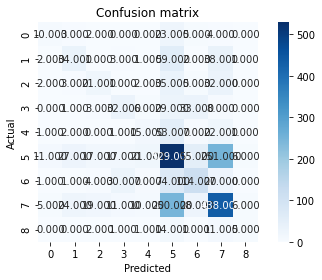

In [29]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [30]:
# Compute evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)) # accuracy
print('Error:', 1 - metrics.accuracy_score(y_test, y_pred)) # error
print('Precision:', metrics.precision_score(y_test, y_pred, average = None)) # precision
print('Recall:', metrics.recall_score(y_test, y_pred, average = None)) # recall
print('F1 Scores:', metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))) # F1 score

Accuracy: 0.475208250694169
Error: 0.524791749305831
Precision: [0.3125     0.35789474 0.30434783 0.33333333 0.23809524 0.49624765
 0.456      0.52707581 0.26315789]
Recall: [0.21276596 0.24113475 0.20792079 0.28571429 0.14705882 0.56638116
 0.44186047 0.55372946 0.14285714]
F1 Scores: 0.46570688791036563


In [31]:
# CLASSIFIER: Random forest
# Build random forest
model = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
# Predict class labels using decision tree
y_pred = model.predict(x_test)

In [33]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[  9   1   0   0   0  23   1  13   0]
 [  2  33   2   1   2  53   3  45   0]
 [  0   1  19   2   3  30   5  41   0]
 [  0   2   4  29   2  20  43  12   0]
 [  0   1   3   4  22  51   7  14   0]
 [ 11  39  11  13  21 587  37 211   4]
 [  0   1   4  33   4  88 105  23   0]
 [  6  21  15  13   2 278  10 446   0]
 [  0   0   4   0   0  18   1   6   6]]


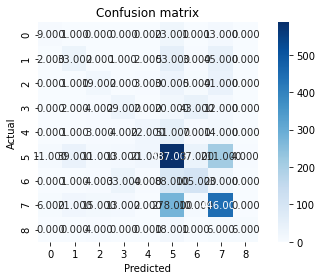

In [34]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [35]:
# Compute evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)) # accuracy
print('Error:', 1 - metrics.accuracy_score(y_test, y_pred)) # error
print('Precision:', metrics.precision_score(y_test, y_pred, average = None)) # precision
print('Recall:', metrics.recall_score(y_test, y_pred, average = None)) # recall
print('F1 Scores:', metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))) # F1 score

Accuracy: 0.49821499404998015
Error: 0.5017850059500198
Precision: [0.32142857 0.33333333 0.30645161 0.30526316 0.39285714 0.51132404
 0.49528302 0.54993835 0.6       ]
Recall: [0.19148936 0.23404255 0.18811881 0.25892857 0.21568627 0.62847966
 0.40697674 0.56384324 0.17142857]
F1 Scores: 0.4859557130655242


In [36]:
# Save the model to disk (RandomForestClassifier)
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))